In [199]:
# importing the library

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import sklearn.metrics

In [201]:
data = pd.read_csv(r"C:\Users\Hxtreme\Downloads\Ecommerce Customers.csv")
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In above output, we could see eight variables in which three were categorical variables and five were continous variables.

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [203]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [204]:
print("unique values in each feature\n")
for i in list(data.columns):
    print(i,"=",data[i].nunique())

unique values in each feature

Email = 500
Address = 500
Avatar = 138
Avg. Session Length = 500
Time on App = 500
Time on Website = 500
Length of Membership = 500
Yearly Amount Spent = 500


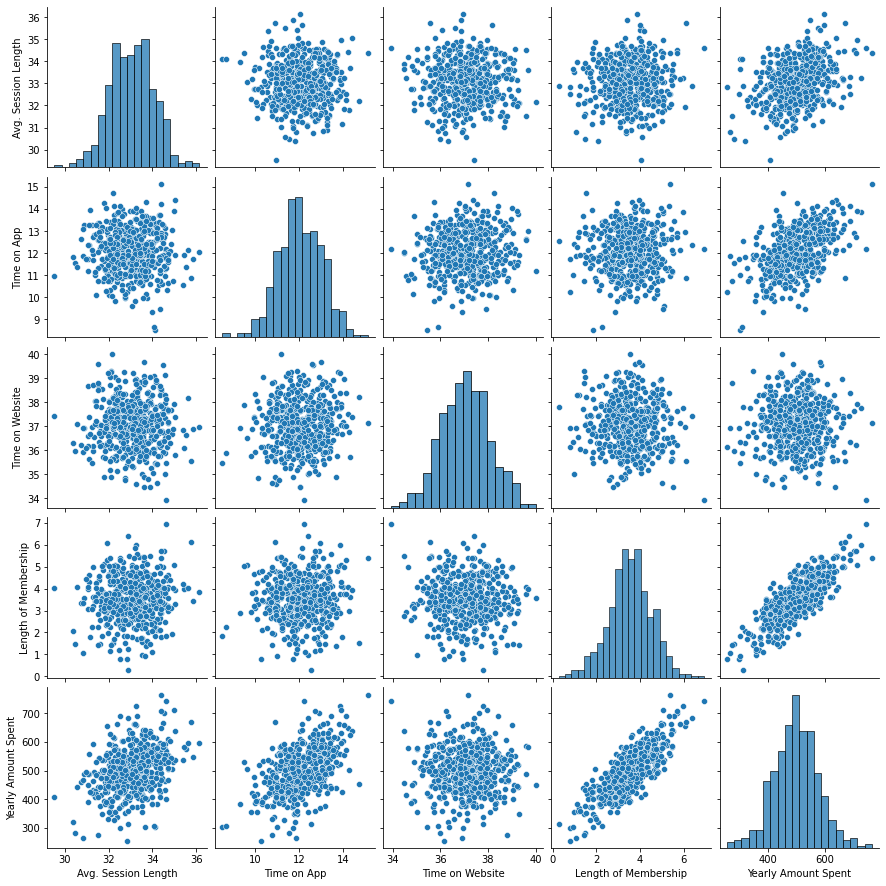

In [205]:
# Correlation between Bivariant
sns.pairplot(data)

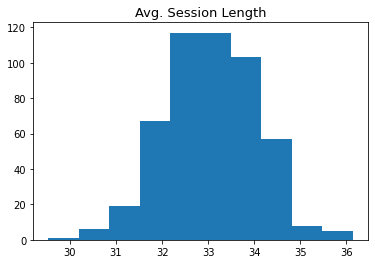

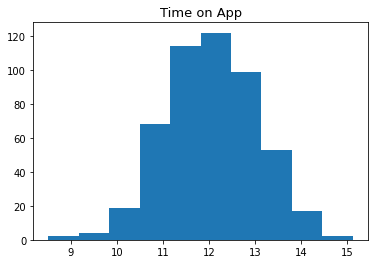

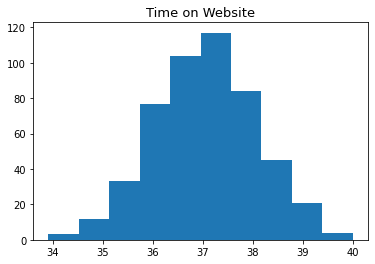

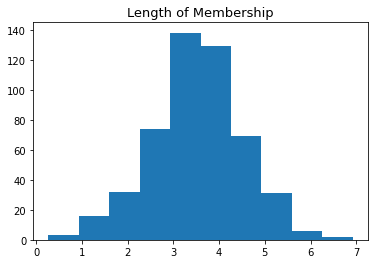

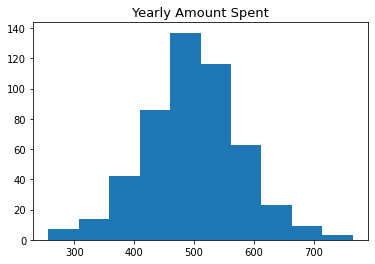

In [206]:
for i in list(data.columns[3:]): 
    plt.hist(data[i])
    plt.title(i,fontsize=13)
    plt.show()

The variables follows normall distribution, So it good to use in Multiple linear regression(MLR).

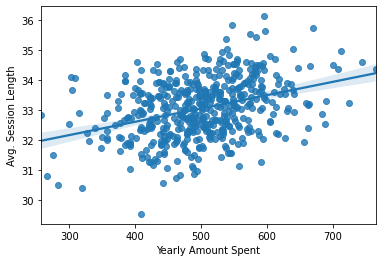

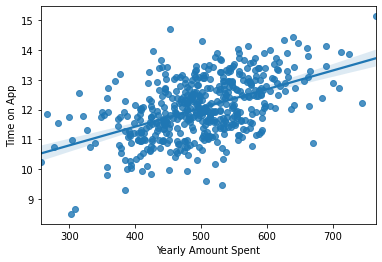

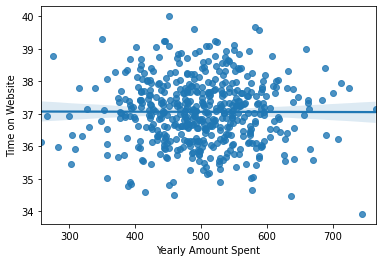

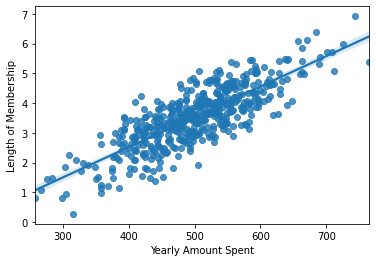

In [207]:
for i in list(data.columns[3:-1]): 
    sns.regplot(x='Yearly Amount Spent',y =data[i], data=data)
    plt.show()
    

We can see in the last figure that there is a linear relationship between length of membership and yearly amount spent of the dataset. We can see that the scatter plots of the rest of the variables are random and show no relationship among them. We should take only one of the multiple independent features having a relationship between them. While here, yearly amount spent are the target variable, so there is no need to drop feature.

There is no anamoly data present in the figure

<ipython-input-208-41a12437375d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True)


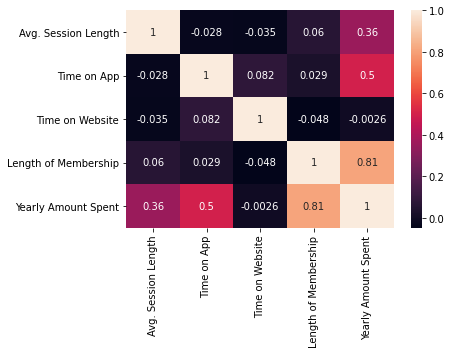

In [208]:
# To check multicollinearity
sns.heatmap(data.corr(), annot = True)
plt.show()

There is no multi collinearity between independent variables.

# Model Building

In [209]:
# Extracting dependent and independent Variables:

In [210]:
X = data[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y= data['Yearly Amount Spent']


In [211]:
# Splitting the dataset into 70% training and 30% test set. 

In [212]:
 from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Why I have choosen multi linear regression (MLR)?


---> MLR helps to estimate the relationship between two or more independent variables and one dependent variable

Assumptions for MLR


---> Every independent variable are not highly corrleated (Multicollinearity). ---> Data follows normall distribution (Multivariate Normality) ---> Outliers will cause significant impact on the mean and the standard deviation.

In [213]:
model = LinearRegression().fit(X_train,y_train)
model

LinearRegression()

In [214]:
y_pred=model.predict(X_test)

[Text(0.5, 0, 'Actual value'), Text(0, 0.5, 'Predicted value')]

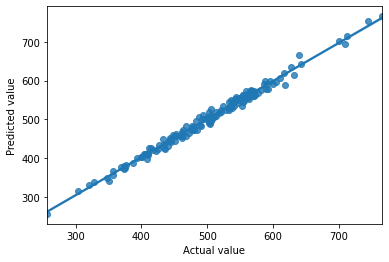

In [215]:
ax = sns.regplot(x=y_test, y=y_pred,data=None) 
ax.set(xlabel='Actual value', ylabel='Predicted value')

From this graph we can see the actual and predicted values have less residual error 

### Model Validation

In [216]:
print('Train Score: ', model.score(X_train, y_train))  
print('Test Score: ', model.score(X_test, y_test))  
print('Intercept',model.intercept_)
print('slope', model.coef_)

Train Score:  0.9817562058732432
Test Score:  0.9890046246741234
Intercept -1047.932782250239
slope [25.98154972 38.59015875  0.19040528 61.27909654]


The above score tells that our model is 98.17% accurate with the training dataset and 98.90% accurate with the test dataset.

In [217]:
# Transformation / Hyper parameter tunning

In [218]:
data.corr()

<ipython-input-218-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


C:\Users\Hxtreme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Yearly Amount Spent', ylabel='Avg. Session Length'>

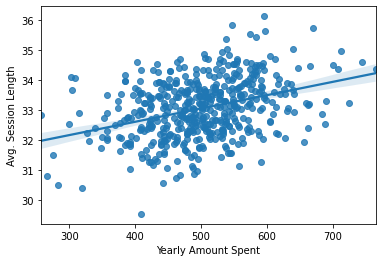

In [219]:
x,y=data['Yearly Amount Spent'],data['Avg. Session Length']
sns.regplot(x,y, data=data)

In [220]:
from scipy.stats import pearsonr
corr, _ = pearsonr(x,y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.355


<AxesSubplot: xlabel='Yearly Amount Spent', ylabel='Avg. Session Length'>

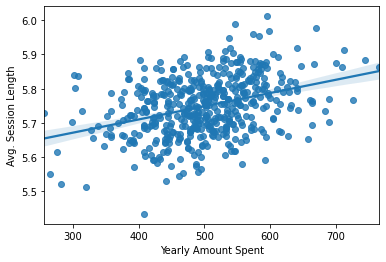

In [221]:
sns.regplot(x='Yearly Amount Spent',y =np.sqrt(data['Avg. Session Length']), data=data)

In [222]:
# Quadratic(sqrt(y)), Reciprocal(1/y), Logarithamic(log(y))
x= np.sqrt(data['Avg. Session Length'])
y = (data['Yearly Amount Spent'])
from scipy.stats import pearsonr
corr, _ = pearsonr(x,y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.355


In [223]:
x= np.sqrt(data['Time on Website'])
y = (data['Yearly Amount Spent'])
from scipy.stats import pearsonr
corr, _ = pearsonr(x,y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.003


In [224]:
x= np.sqrt(data['Length of Membership'])
y = (data['Yearly Amount Spent'])
from scipy.stats import pearsonr
corr, _ = pearsonr(x,y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.800


In [225]:
x= np.sqrt(data['Time on App'])
y = (data['Yearly Amount Spent'])
from scipy.stats import pearsonr
corr, _ = pearsonr(x,y)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.498


This following transformation dosen't help us to increase the linear relationship for independent variable.

      -------------------------------------------------------------------------------------------------------------------     

# Simple Linear regression by statsmodel

This model finds relation between "Length of Membership" and "Yearly Amount Spent".

In [226]:
import statsmodels.api as smf      
model = smf.OLS(y_train,X_train["Length of Membership"]).fit()    # Ordinary least square method for best fit line
model

<AxesSubplot: xlabel='Length of Membership', ylabel='Yearly Amount Spent'>

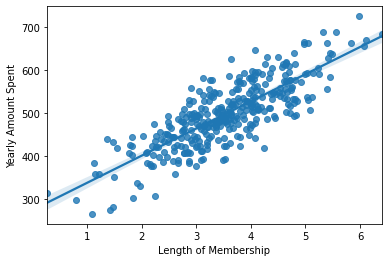

In [227]:
sns.regplot(X_train["Length of Membership"],y_train,data=None) 
# This follows linear relationship

In [228]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.971
Model:                             OLS   Adj. R-squared (uncentered):              0.971
Method:                  Least Squares   F-statistic:                          1.164e+04
Date:                 Thu, 05 Jan 2023   Prob (F-statistic):                   4.34e-270
Time:                         22:41:13   Log-Likelihood:                         -2056.1
No. Observations:                  350   AIC:                                      4114.
Df Residuals:                      349   BIC:                                      4118.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Length of Membership   135.2679      1.254    107.870      0.000     132.802     137.734
==============================================================================
Omnibus:                        0.247   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.884   Jarque-Bera (JB):                0.341
Skew:                           0.055   Prob(JB):                        0.843
Kurtosis:                       2.894   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [237]:
y_pred = model.predict(X_test["Length of Membership"])
print("Test accuracy",sklearn.metrics.r2_score(y_test,y_pred))

Test accuracy -0.13220059652615412


C:\Users\Hxtreme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: xlabel='Yearly Amount Spent'>

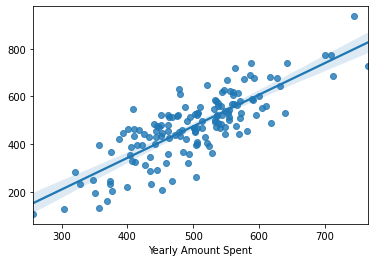

In [238]:
sns.regplot(y_test,y_pred) 

This graph shows we have high residual error in actual and predicted value.

Simple linear regression have 97% train accuracy and -13% test accuracy, So it failed to predict value

# Ridge Regression

--> Ridge regression helps to prevent overfitting.
--> It will able to create generalised model

In [ ]:
from sklearn.linear_model import Ridge
rid = Ridge(alpha=1.0)
model = rid.fit(X_train,y_train)
model

In [ ]:
print('Train Score: ', model.score(X_train, y_train))  
print('Test Score: ', model.score(X_test, y_test))  
print('Intercept',model.intercept_)
print('slope', model.coef_)

# Lasso Regression 

--> Apart from preventing from overfitting. It will also helps selecting feature selection

In [240]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
model = clf.fit(X_train,y_train)
model

Lasso(alpha=0.1)

In [241]:
print('Train Score: ', model.score(X_train, y_train))  
print('Test Score: ', model.score(X_test, y_test))  
print('Intercept',model.intercept_)
print('slope', model.coef_)

Train Score:  0.9817492686027344
Test Score:  0.9889567687356814
Intercept -1039.3289391715255
slope [25.88092177 38.48562304  0.09172564 61.17661057]


# Finall inference 

We developed a multi linear regression that gives good result. Then we try to cut the overfitting thus we use "ridge" and "Lasso" model but there is not much difference in result. So, Finally we use multi linear for our prediction.